In [32]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
engagement = pd.read_csv('https://raw.githubusercontent.com/gSchool/dsi-interview-prep/master/interview_questions/takehomes/takehome1/example_engagements.csv?token=Afcpp5EjERJhKh0D4C59V8LB_MRXKStSks5bGZlqwA%3D%3D')

In [8]:
offers = pd.read_csv('https://raw.githubusercontent.com/gSchool/dsi-interview-prep/master/interview_questions/takehomes/takehome1/example_offers.csv?token=AfcppygqCGPBJpE4BiDYrP9Uak5-Ie_cks5bGZotwA%3D%3D')

In [7]:
engagement.head(5)

,Unnamed: 0,revenue,reward_id,campaign_id,application_id
0,2014-07-26 00:00:29.257095,0.499,53d2ef9d-361c-c0d1-9015-6525c28c8564,18,3
1,2014-07-26 00:00:30.468959,0.149,53d2ef9e-72f3-84bf-a243-78ae58d1626f,4,0
2,2014-07-26 00:00:43.396503,0.149,53d2efab-91fb-ec54-3435-40a502e34e83,4,3
3,2014-07-26 00:01:01.234404,0.149,53d2efbd-8f91-db89-12d3-c373bcde9c30,4,3
4,2014-07-26 00:01:15.100982,0.149,53d2efcb-3e74-a234-f986-938765766950,4,0


In [85]:
engagement.shape

(2441, 5)

In [55]:
Counter(engagement.revenue).keys()
Counter(engagement.revenue).values()

dict_values([82, 1356, 143, 180, 113, 35, 17, 40, 64, 169, 21, 54, 31, 9, 3, 5, 2, 19, 8, 8, 14, 14, 6, 5, 6, 20, 5, 2, 1, 1, 1, 2, 1, 3, 1])

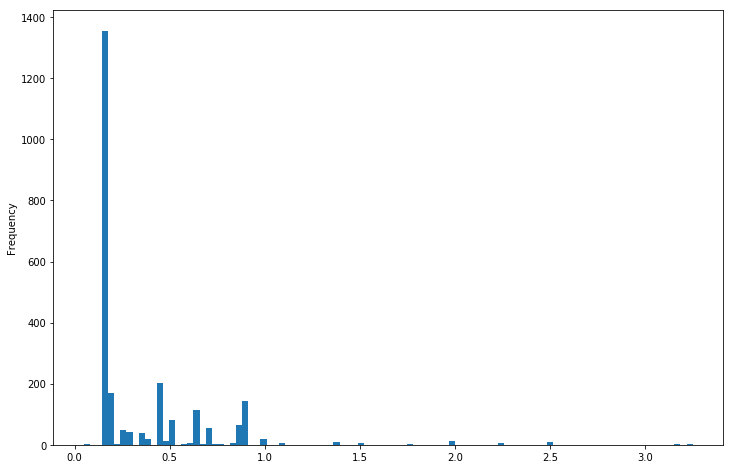

In [71]:
engagement.revenue.plot(kind='hist', bins= 100, figsize = (12,8));


In [14]:
engagement.application_id.unique()

array([3, 0, 1, 2])

In [21]:
engagement.campaign_id

array([18,  4, 25, 65, 43, 10,  7, 15,  0,  3, 31, 38, 37, 12,  9, 40,  1,
       26, 36, 22, 32, 34, 14, 46, 30, 29, 21, 54, 24, 23,  5, 61, 49,  8,
       59, 16,  2,  6, 28, 27, 66, 35, 11, 70, 42, 13, 17, 57, 50, 48, 33,
       52, 62, 19, 51, 60, 67, 89, 55, 39, 47, 71, 90, 86, 45, 64, 74, 53])

In [79]:
engagement.groupby('campaign_id').agg({'application_id':'count'}).head()

,application_id
campaign_id,
0,17
1,32
2,17
3,14
4,1347


In [82]:
offers.groupby('campaign_id').agg({'application_id':'count'}).head()

,application_id
campaign_id,
0,1068
1,3209
2,624
3,988
4,11674


In [9]:
offers.head(5)

,Unnamed: 0,reward_id,application_id,campaign_id
0,2014-07-26 00:00:02.995009,53d2ef83-0008-50fd-80b6-022bd353332d,0,0
1,2014-07-26 00:00:03.114537,53d2ef83-1860-7515-2f58-bc73db3b6ce8,1,1
2,2014-07-26 00:00:03.738329,53d2ef83-dc59-4efc-8e6d-1840b994e96d,0,2
3,2014-07-26 00:00:04.333408,53d2ef84-ef12-f2f9-799f-d549f4acf691,1,0
4,2014-07-26 00:00:05.023120,53d2ef85-a900-e839-b0e5-4d07d619fa58,0,0


In [12]:
offers.application_id.unique()

array([0, 1, 2, 3])

In [22]:
offers.campaign_id.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90])

In [83]:
offers.shape

(79322, 4)

In [117]:
offers.merge(engagement, on = 'reward_id')

,Unnamed: 0_x,reward_id,application_id_x,campaign_id_x,Unnamed: 0_y,revenue,campaign_id_y,application_id_y


## pandas join 
- join through index on dataframe
- by default it is left join
- when 'on' is defined it is referring to the left dataframe

In [98]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2'])
    

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])

In [99]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [100]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [118]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [106]:
left.join(right, how = 'outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [111]:
left1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3'],
                     'key': ['K0', 'K1', 'K2', 'K1']})


right1 = pd.DataFrame({'C': ['C0', 'C1'],
                       'D': ['D0', 'D1']},
                       index=['K0', 'K1'])
 
result = left1.join(right1, on='key')

In [112]:
left1

,A,B,key
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K2
3,A3,B3,K1


In [113]:
right1

,C,D
K0,C0,D0
K1,C1,D1


In [114]:
result

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,NaN,NaN
3,A3,B3,K1,C1,D1


In [116]:
pd.merge(left1, right1, left_on='key', right_index=True, how='left')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,NaN,NaN
3,A3,B3,K1,C1,D1
